In [35]:
# 추가 데이터로 모델 성능이 일반적으로 괜찮은지 확인하기 위해서 만듬
import pandas as pd
import matplotlib.pyplot as plt
file_path = r"C:\Users\rladn\Downloads\서울시 부동산 실거래가 정보.csv"
data = pd.read_csv(file_path, encoding='cp949')
data.head()


C:\Users\rladn\AppData\Local\Temp\ipykernel_28636\3134544690.py:4: DtypeWarning: Columns (7,15,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, encoding='cp949')


,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
0,2023,11320,도봉구,10500,쌍문동,1.0,대지,0490,16.0,현대맨숀,...,12000,59.96,32.00,-1.0,NaN,NaN,1994.0,연립다세대,중개거래,서울 도봉구
1,2023,11350,노원구,10500,상계동,1.0,대지,0138,166.0,화이트빌,...,30000,50.84,30.29,4.0,NaN,NaN,2016.0,연립다세대,중개거래,서울 노원구
2,2023,11350,노원구,10500,상계동,1.0,대지,0135,35.0,보람하이츠빌라,...,25500,42.50,20.62,1.0,NaN,NaN,1995.0,연립다세대,중개거래,서울 노원구
3,2023,11215,광진구,10500,자양동,1.0,대지,0647,33.0,(647-33),...,20000,24.23,14.70,5.0,NaN,NaN,2014.0,연립다세대,중개거래,서울 광진구
4,2023,11740,강동구,10500,길동,1.0,대지,0384,5.0,에이치비골드빌(103동),...,59990,62.39,0.00,10.0,NaN,NaN,2004.0,아파트,중개거래,서울 강동구


In [36]:
# Extracting the '계약일' column and creating a new column '계약년월' with the YYYYMM format
data['계약년월'] = data['계약일'].astype(str).str[:-2]

# Grouping by '계약년월' and calculating the average of '물건금액(만원)'
avg_price_by_month_full = data.groupby('계약년월')['물건금액(만원)'].mean().reset_index()

avg_price_by_month_full

,계약년월,물건금액(만원)
0,200601,23444.675439
1,200602,22578.839785
2,200603,23229.571322
3,200604,22681.387662
4,200605,22319.900412
...,...,...
207,202304,72858.088889
208,202305,65225.215812
209,202306,64354.746939
210,202307,67804.885177


In [37]:
# Filtering the data to include only rows where '법정동명' is '상계동'
sanggye_data = data[data['법정동명'] == '상계동']

# Extracting the '계약일' column and creating a new column '계약년월' with the YYYYMM format
sanggye_data['계약년월'] = sanggye_data['계약일'].astype(str).str[:-2]

# Grouping by '계약년월' and calculating the average of '물건금액(만원)'
avg_price_sanggye = sanggye_data.groupby('계약년월')['물건금액(만원)'].mean().reset_index()

avg_price_sanggye


C:\Users\rladn\AppData\Local\Temp\ipykernel_28636\3927600563.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sanggye_data['계약년월'] = sanggye_data['계약일'].astype(str).str[:-2]


,계약년월,물건금액(만원)
0,200601,14338.539823
1,200602,14180.124646
2,200603,15035.026477
3,200604,14893.150313
4,200605,15007.442584
...,...,...
207,202304,49967.747748
208,202305,48890.517241
209,202306,52322.272727
210,202307,54395.526316


Epoch 1/100
6/6 [==============================] - 12s 675ms/step - loss: 0.3078 - val_loss: 0.7829
Epoch 2/100
6/6 [==============================] - 0s 20ms/step - loss: 0.2846 - val_loss: 0.7476
Epoch 3/100
6/6 [==============================] - 0s 20ms/step - loss: 0.2559 - val_loss: 0.6991
Epoch 4/100
6/6 [==============================] - 0s 22ms/step - loss: 0.2192 - val_loss: 0.6295
Epoch 5/100
6/6 [==============================] - 0s 22ms/step - loss: 0.1748 - val_loss: 0.5259
Epoch 6/100
6/6 [==============================] - 0s 23ms/step - loss: 0.1118 - val_loss: 0.3784
Epoch 7/100
6/6 [==============================] - 0s 24ms/step - loss: 0.0873 - val_loss: 0.2572
Epoch 8/100
6/6 [==============================] - 0s 22ms/step - loss: 0.1020 - val_loss: 0.1980
Epoch 9/100
6/6 [==============================] - 0s 20ms/step - loss: 0.1048 - val_loss: 0.1836
Epoch 10/100
6/6 [==============================] - 0s 23ms/step - loss: 0.0996 - val_loss: 0.1924
Epoch 11/100
6/6 

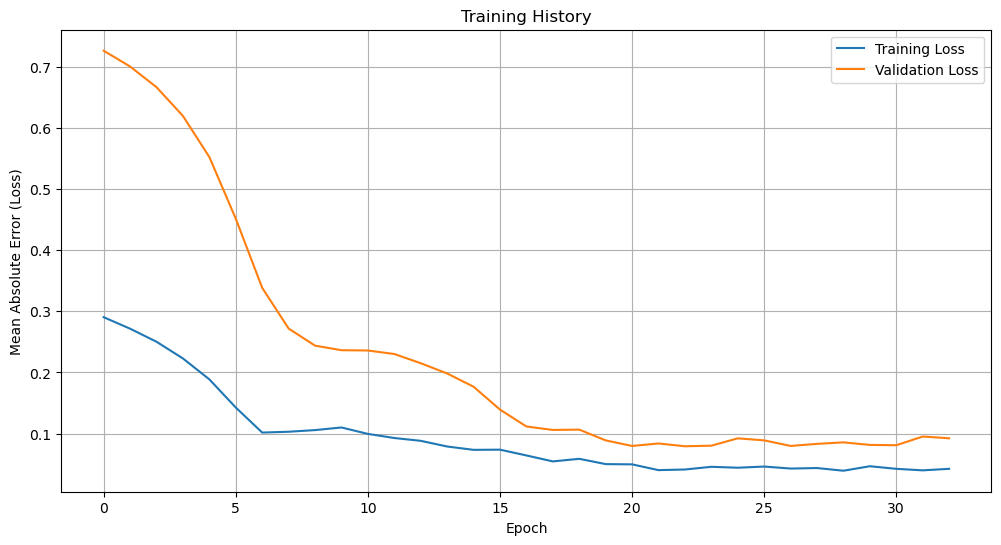

In [38]:
# IQR을 사용한 이상치 판별
Q1 = avg_price_sanggye['물건금액(만원)'].quantile(0.25)
Q3 = avg_price_sanggye['물건금액(만원)'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 판별 기준
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 제거
filtered_data = avg_price_sanggye[(avg_price_sanggye['물건금액(만원)'] >= lower_bound) & 
                                  (avg_price_sanggye['물건금액(만원)'] <= upper_bound)]

# 스케일링
scaled_filtered = scaler.fit_transform(filtered_data['물건금액(만원)'].values.reshape(-1, 1))

# 데이터 분할
train_size_filtered = int(len(scaled_filtered) * 0.9)
train_filtered, test_filtered = scaled_filtered[:train_size_filtered, :], scaled_filtered[train_size_filtered:, :]

# 데이터셋 생성
X_train_filtered, y_train_filtered = create_dataset(train_filtered, look_back)
X_test_filtered, y_test_filtered = create_dataset(test_filtered, look_back)

# LSTM 모델 입력 형태에 맞게 3D로 변환
X_train_filtered = np.reshape(X_train_filtered, (X_train_filtered.shape[0], 1, X_train_filtered.shape[1]))
X_test_filtered = np.reshape(X_test_filtered, (X_test_filtered.shape[0], 1, X_test_filtered.shape[1]))

# LSTM 모델 학습
model_filtered = Sequential()
model_filtered.add(LSTM(100, input_shape=(X_train_filtered.shape[1], X_train_filtered.shape[2]), return_sequences=True))
model_filtered.add(Dropout(0.2))
model_filtered.add(LSTM(50, return_sequences=True))
model_filtered.add(Dropout(0.2))
model_filtered.add(LSTM(25))
model_filtered.add(Dropout(0.2))
model_filtered.add(Dense(1))
model_filtered.compile(loss='mae', optimizer='adam')

history_filtered = model_filtered.fit(X_train_filtered, y_train_filtered, epochs=100, batch_size=32, 
                                      validation_data=(X_test_filtered, y_test_filtered), 
                                      verbose=1, shuffle=False, callbacks=[early_stop])

# 예측 수행
y_pred_filtered = model_filtered.predict(X_test_filtered)

# 스케일링된 값을 원래의 범위로 변환
inv_y_pred_filtered = scaler.inverse_transform(y_pred_filtered)
inv_y_test_filtered = scaler.inverse_transform(y_test_filtered.reshape(-1, 1))

# Plotting the training history with R^2 value
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error (Loss)')
plt.title(f'Training History')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
# RMSE Calculation
from numpy import sqrt 
from sklearn.metrics import mean_absolute_error
rmse_filtered = sqrt(mean_squared_error(inv_y_test_filtered, inv_y_pred_filtered))

# MAE Calculation
mae_filtered = mean_absolute_error(inv_y_test_filtered, inv_y_pred_filtered)

# MAPE Calculation
mape_filtered = np.mean(np.abs((inv_y_test_filtered - inv_y_pred_filtered) / inv_y_test_filtered)) * 100

# MASE Calculation
naive_forecast = train_filtered[:-1]
actual_values = train_filtered[1:]
naive_mae = mean_absolute_error(actual_values, naive_forecast)
mase_filtered = mae_filtered / naive_mae

rmse_filtered, mae_filtered, mape_filtered, mase_filtered

(6545.718625375572, 5290.149005706333, 11.944474266036782, 221375.22487576032)

In [44]:
# 로그 변환
avg_price_sanggye['Log_transformed'] = np.log(avg_price_sanggye['물건금액(만원)'] + 1)  # +1 is to avoid log(0)

# 스케일링
scaled_log_transformed = scaler.fit_transform(avg_price_sanggye['Log_transformed'].values.reshape(-1, 1))

# 데이터 분할
train_size_log = int(len(scaled_log_transformed) * 0.9)
train_log, test_log = scaled_log_transformed[:train_size_log, :], scaled_log_transformed[train_size_log:, :]

# 데이터셋 생성
X_train_log, y_train_log = create_dataset(train_log, look_back)
X_test_log, y_test_log = create_dataset(test_log, look_back)

# LSTM 모델 입력 형태에 맞게 3D로 변환
X_train_log = np.reshape(X_train_log, (X_train_log.shape[0], 1, X_train_log.shape[1]))
X_test_log = np.reshape(X_test_log, (X_test_log.shape[0], 1, X_test_log.shape[1]))

# LSTM 모델 학습
model_log = Sequential()
model_log.add(LSTM(100, input_shape=(X_train_log.shape[1], X_train_log.shape[2]), return_sequences=True))
model_log.add(Dropout(0.2))
model_log.add(LSTM(50, return_sequences=True))
model_log.add(Dropout(0.2))
model_log.add(LSTM(25))
model_log.add(Dropout(0.2))
model_log.add(Dense(1))
model_log.compile(loss='mae', optimizer='adam')

history_log = model_log.fit(X_train_log, y_train_log, epochs=100, batch_size=32, 
                            validation_data=(X_test_log, y_test_log), 
                            verbose=1, shuffle=False, callbacks=[early_stop])

# 예측 수행
y_pred_log = model_log.predict(X_test_log)

# 스케일링된 값을 원래의 범위로 변환
inv_y_pred_log = np.exp(scaler.inverse_transform(y_pred_log)) - 1  # Inverting log transformation
inv_y_test_log = np.exp(scaler.inverse_transform(y_test_log.reshape(-1, 1))) - 1

rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
mae = mean_absolute_error(y_test_original, y_pred_original)
mape = np.mean(np.abs((y_test_original - y_pred_original) / y_test_original)) * 100
mase = np.mean(np.abs((y_pred_original - y_test_original) / np.mean(y_test_original)))

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")
print(f"MASE: {mase}")



Epoch 1/100
6/6 [==============================] - 15s 357ms/step - loss: 0.4121 - val_loss: 0.7904
Epoch 2/100
6/6 [==============================] - 0s 13ms/step - loss: 0.3890 - val_loss: 0.7591
Epoch 3/100
6/6 [==============================] - 0s 13ms/step - loss: 0.3606 - val_loss: 0.7162
Epoch 4/100
6/6 [==============================] - 0s 13ms/step - loss: 0.3234 - val_loss: 0.6535
Epoch 5/100
6/6 [==============================] - 0s 12ms/step - loss: 0.2696 - val_loss: 0.5568
Epoch 6/100
6/6 [==============================] - 0s 12ms/step - loss: 0.1952 - val_loss: 0.4060
Epoch 7/100
6/6 [==============================] - 0s 12ms/step - loss: 0.0943 - val_loss: 0.1952
Epoch 8/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0949 - val_loss: 0.0995
Epoch 9/100
6/6 [==============================] - 0s 11ms/step - loss: 0.1194 - val_loss: 0.1208
Epoch 10/100
6/6 [==============================] - 0s 11ms/step - loss: 0.1084 - val_loss: 0.1804
Epoch 11/100
6/6 

NameError: name 'y_test_original' is not defined